In [1]:
from gapfinder.feedback import create_roi_vs_contours_images

# get the contents of the poi folder, but only the folder names
poi_folder = f"./output/processed_images"
roi_folder = f"./images/roi_images"
metadata_csv = f"{roi_folder}/roi_metadata.csv"
clear_existing = True

create_roi_vs_contours_images( metadata_csv, roi_folder, poi_folder, clear_existing)

In [2]:
print("hello")

hello


# Split the repeat distances
We need to split the lumen repeat_distance variable into two groups:
- repeat_distance_edge: the distance between the center first edge membrane to the center of the next inner membrane, or the distance between the center of the last inner membrane to the center of the first edge membrane
- repeat_distance_center: the distance between the center of the first inner membrane to the center of the next inner membrane

In [35]:
import pandas as pd 

lumen_data_path = f"./output/lumen.csv"
lumen_data = pd.read_csv(lumen_data_path)

# Get max index values for each image_name
max_index = lumen_data.groupby("image_name")["index"].max().reset_index()

# Mark the first and last index of each image_name as belonging to the edge
lumen_data["edge"] = lumen_data.apply(lambda row: row["index"] == 0 or row["index"] == max_index[max_index["image_name"] == row["image_name"]]["index"].values[0], axis=1)

# Split the repeat_distance column into two columns repeat_distance_outer and repeat_distance_inner
lumen_data["repeat_distance_edge"] = lumen_data.apply(lambda row: row["repeat_distance"] if row["edge"] else None, axis=1)
lumen_data["repeat_distance_center"] = lumen_data.apply(lambda row: row["repeat_distance"] if not row["edge"] else None, axis=1)

# save it to a new csv file
lumen_data.to_csv(f"./output/lumen_repeat_split.csv", index=False)

lumen_data.head(10)

,strip,image_name,px_per_nm,nm_per_px,scale,scale_pixels,grana_height,num_lumen,repeat_distance,lumen_width,lumen_width_heights,peaks,type,process,index,lumen_width_nm,edge,repeat_distance_edge,repeat_distance_center
0,0,output\processed_images\0_otsuOffset\membrane\...,0.88,1.136364,500,440,110.303030,8,11.55,4.340722,7650.0,52,lumen,0_otsuOffset,0,4.932639,True,11.55,NaN
1,0,output\processed_images\0_otsuOffset\membrane\...,0.88,1.136364,500,440,110.303030,8,13.35,3.962644,7650.0,65,lumen,0_otsuOffset,1,4.503004,False,NaN,13.35
2,0,output\processed_images\0_otsuOffset\membrane\...,0.88,1.136364,500,440,110.303030,8,13.04,3.945055,7650.0,79,lumen,0_otsuOffset,2,4.483017,False,NaN,13.04
3,0,output\processed_images\0_otsuOffset\membrane\...,0.88,1.136364,500,440,110.303030,8,14.42,5.376623,7650.0,92,lumen,0_otsuOffset,3,6.109799,False,NaN,14.42
4,0,output\processed_images\0_otsuOffset\membrane\...,0.88,1.136364,500,440,110.303030,8,13.41,4.302326,7650.0,107,lumen,0_otsuOffset,4,4.889006,False,NaN,13.41
5,0,output\processed_images\0_otsuOffset\membrane\...,0.88,1.136364,500,440,110.303030,8,13.40,4.160000,7650.0,120,lumen,0_otsuOffset,5,4.727273,False,NaN,13.40
6,0,output\processed_images\0_otsuOffset\membrane\...,0.88,1.136364,500,440,110.303030,8,14.05,3.987715,7650.0,134,lumen,0_otsuOffset,6,4.531494,False,NaN,14.05
7,0,output\processed_images\0_otsuOffset\membrane\...,0.88,1.136364,500,440,110.303030,8,11.71,3.897727,7650.0,148,lumen,0_otsuOffset,7,4.429236,True,11.71,NaN
8,0,output\processed_images\10_otsuOffset\membrane...,0.88,1.136364,500,440,127.105263,11,5.90,0.555556,12622.5,32,lumen,10_otsuOffset,0,0.631313,True,5.90,NaN
9,0,output\processed_images\10_otsuOffset\membrane...,0.88,1.136364,500,440,127.105263,11,1.88,0.625000,9307.5,37,lumen,10_otsuOffset,1,0.710227,False,NaN,1.88


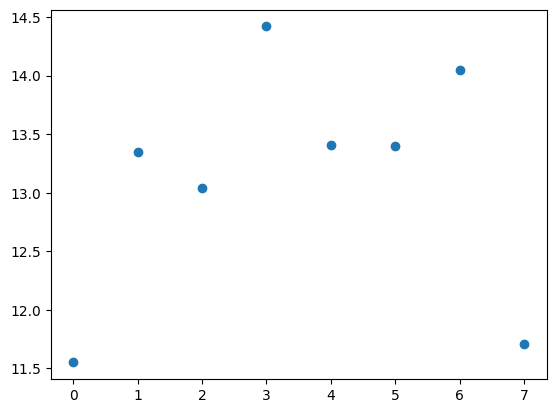

In [45]:
import matplotlib.pyplot as plt

# Select ["process"]  that is just 0_otsuOffset
lumen_data_2 = lumen_data[lumen_data["process"].isin(["0_otsuOffset"])]
lumen_data_2.head(20)

# scatter plot of "repeat_distance" by "process"
plt.scatter(lumen_data_2["index"], lumen_data_2["repeat_distance"])
